# Project: Investigate a Dataset - [TMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10000 movies collected and comes from the movie database(TMDB) including the user ratings and revenue. It consistes of 21 columns each represent information about the movies as id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj. 

Columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



### Question(s) for Analysis

1. What are the top movies based on features?
2. What are the top genres?
3. Correlations
 


In [1]:
#Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data 
df_movie = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [3]:
# Print out a few liens
df_movie.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# the name od columns on the data set
df_movie.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Dislay the Data's data type and dimensions
The data set has 10866 rows and 21 columns

In [5]:
df_movie.shape

(10866, 21)

### Display data set information
Display and check data types and basic informations of columns

In [6]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#Display the number of missing values
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Based on the above output

1. 9 columns with missing data
2. released_date should have datetime datatype
   

In [8]:
#Check for a duplicate rows
df_movie.duplicated().sum()

1

In [9]:
#Print the duplicated row
df_movie[df_movie.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### General statistics about the movie data frame 

In [10]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Information from above statistics 
1. The dataset contains movie between 1960 and 2015, which is 56 years of movie information
2. The average movie budget is 14,625,700 (17,551,040 after infilation) and 50% of the movie budget is 0.
3. The average score of the movie is about 5.97 with a maximum of 9.2 and minimum of 1.5, 50% of the movie have score 6.
4. Min value in budget, revenue, runtime, budget_adj and revenue_adj is 0, which is treated as nan values as it's irrelevant for our analysis 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf531200b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdf52e9d0b8>]], dtype=object)

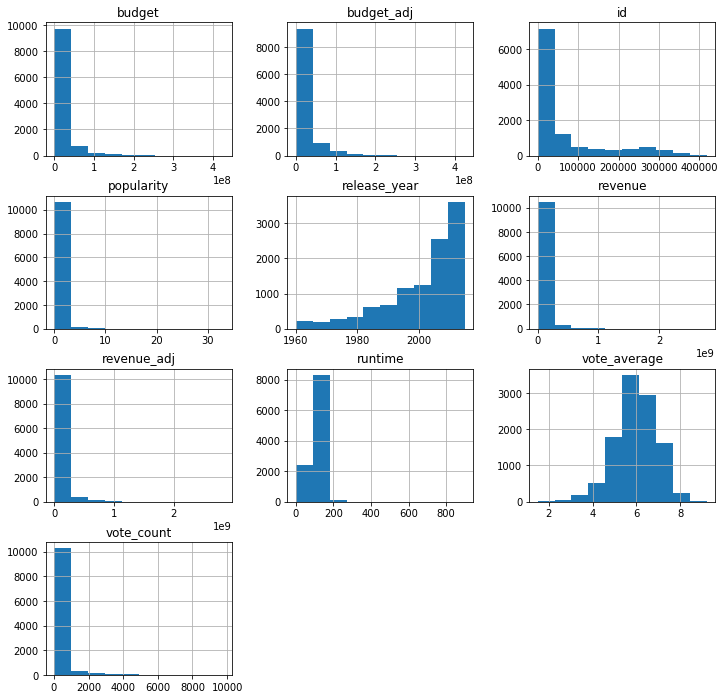

In [11]:
# Examine the data by visualize the data by columns
df_movie.hist(figsize = (12,12))


### Data Cleaning

Drop irrelevant columns, missing values and rows that contain 0 values.
 

In [12]:
# Drop irrelevant columns 
df_movie.drop(['homepage','tagline','production_companies','keywords','overview','imdb_id','id','release_date'], inplace = True, axis = 1)

In [13]:
# Check the change
df_movie.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [14]:
# Drop missing values
df_movie.dropna(inplace = True)

In [15]:
# Check the change 
df_movie.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [16]:
# Remove rows that contain 0 value
to_be_cleaned = df_movie[(df_movie.revenue_adj == 0)|(df_movie.budget_adj == 0)|(df_movie.runtime == 0)]
df_movie.drop(to_be_cleaned .index,inplace=True)

In [17]:
# over view the change made
df_movie.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3.850000e+03,3.850000e+03,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192778,3.724698e+07,1.077871e+08,109.212987,528.278442,6.168390,2001.260519,4.428989e+07,1.371959e+08
std,1.475462,4.221167e+07,1.766030e+08,19.913488,880.245090,0.794817,11.285056,4.480837e+07,2.161848e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463380,1.000000e+07,1.363273e+07,95.000000,71.000000,5.700000,1995.000000,1.317218e+07,1.841498e+07
50%,0.798343,2.400000e+07,4.488472e+07,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,5.000000e+07,1.242969e+08,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [18]:
# split columns with multiple values

def seprate_values(col):
    new_cols=(df_movie[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols

In [19]:
df_movie_gen = seprate_values('genres')
df_movie_cast = seprate_values('cast')

In [20]:
df_movie['cast'] = df_movie_cast['cast_1']
df_movie['genres'] = df_movie_gen['genres_1']

<a id='eda'></a>
## Exploratory Data Analysis



### 1. Top movies based on features
Based on the following attribute(popularity, budget, revenue and vote_average), we will found out the top five movies.


#### 1.1: Top 5 Movies based on popularity
The below code displays the barplot that represent the top 5 movies based on their popularity

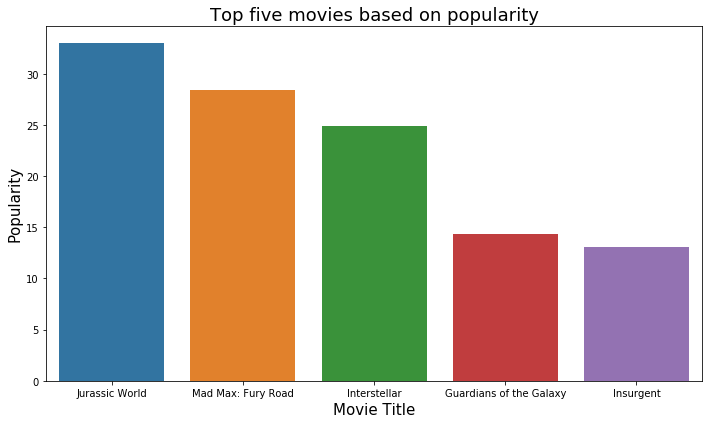

In [21]:
plt.figure(figsize=(10,6))
# make barplot and sort bars in descending order
sns.barplot(x='original_title', 
            y="popularity", 
            data=df_movie, 
            order=df_movie.sort_values('popularity',ascending = False).head(5).original_title)
# set labels
plt.xlabel("Movie Title", size=15)
plt.ylabel("Popularity", size=15)
plt.title("Top five movies based on popularity", size=18)
plt.tight_layout()
plt.show()

According to the above data Jurassic world, Mad max: Fury Road, Interstellar, Guardians of the Galaxy and Insurgent are the top five movies based on their popularity.



#### 1.2: Top 5 Movies based on Budget
The below code displays the barplot that represent the top 5 movies based on their adjusted budget

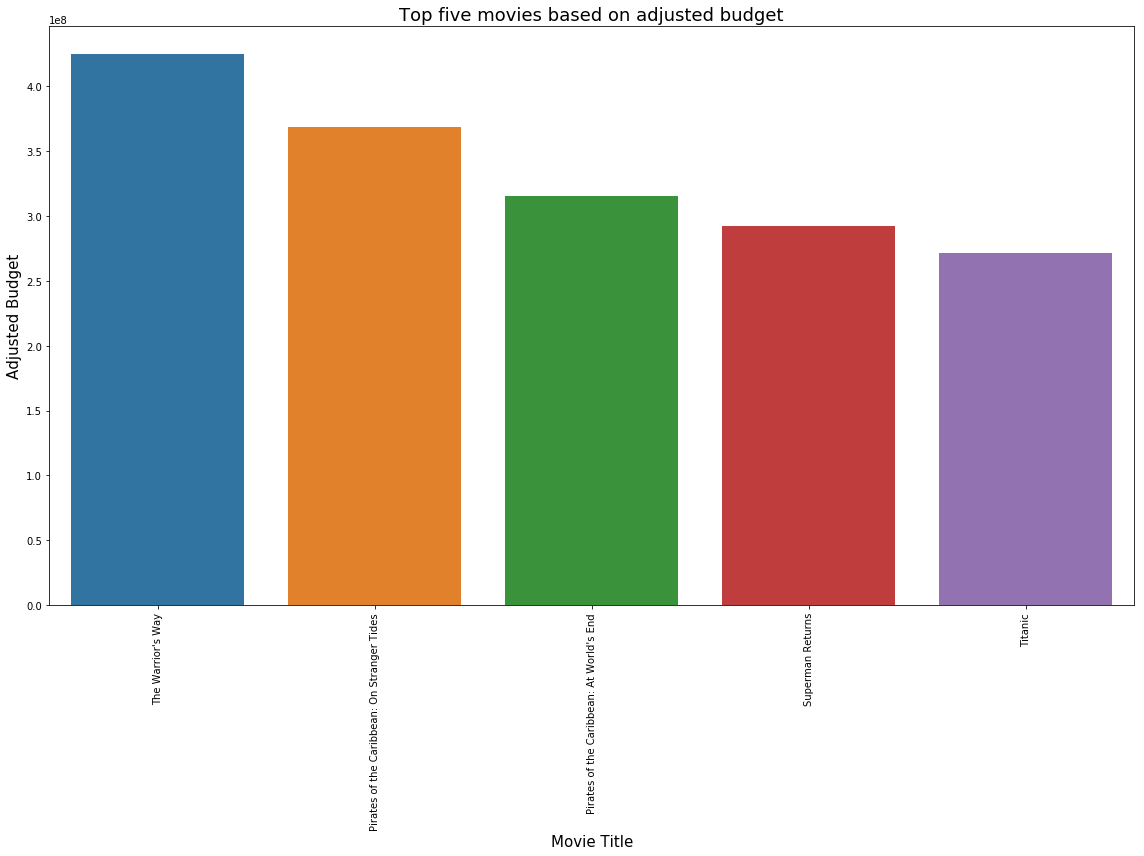

In [22]:
plt.figure(figsize=(16,12))
# make barplot and sort bars in descending order
sns.barplot(x='original_title', 
            y="budget_adj", 
            data=df_movie, 
            order=df_movie.sort_values('budget_adj',ascending = False).head(5).original_title)
# set labels
plt.xlabel("Movie Title", size=15)
plt.ylabel("Adjusted Budget", size=15)
plt.title("Top five movies based on adjusted budget", size=18)
#rotate x-axis text to make readable 
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

According to the above data The Warriors Way, Pirates of the Caribean:on Stranger Tides, Pirates of the Caribean: At World's End, Superman Returns and Titanic are the top five movies based on their adjusted Budget.



#### 1.3: Top 5 Movies based on Revenue
The below code displays the barplot that represent the top 5 movies based on their revenue

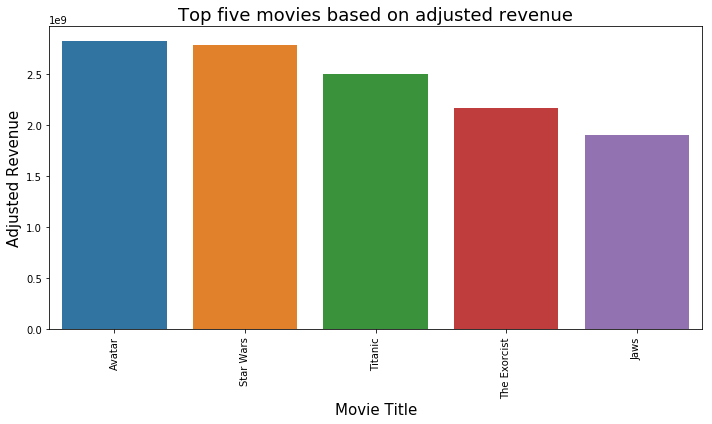

In [23]:
plt.figure(figsize=(10,6))
# make barplot and sort bars in descending order
sns.barplot(x='original_title', 
            y="revenue_adj", 
            data=df_movie, 
            order=df_movie.sort_values('revenue_adj',ascending = False).head(5).original_title)
# set labels
plt.xlabel("Movie Title", size=15)
plt.ylabel("Adjusted Revenue", size=15)
plt.title("Top five movies based on adjusted revenue", size=18)
#rotate x-axis text to make readable 
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

According to the above data Avater, Star Wars, Titanic, The Exorcist and Jaws are the top five movies based on their adjusted revenue.

#### 1.4: Top 5 Movies based on Average Vote
The below code displays the barplot that represent the top 5 movies based on their average vote

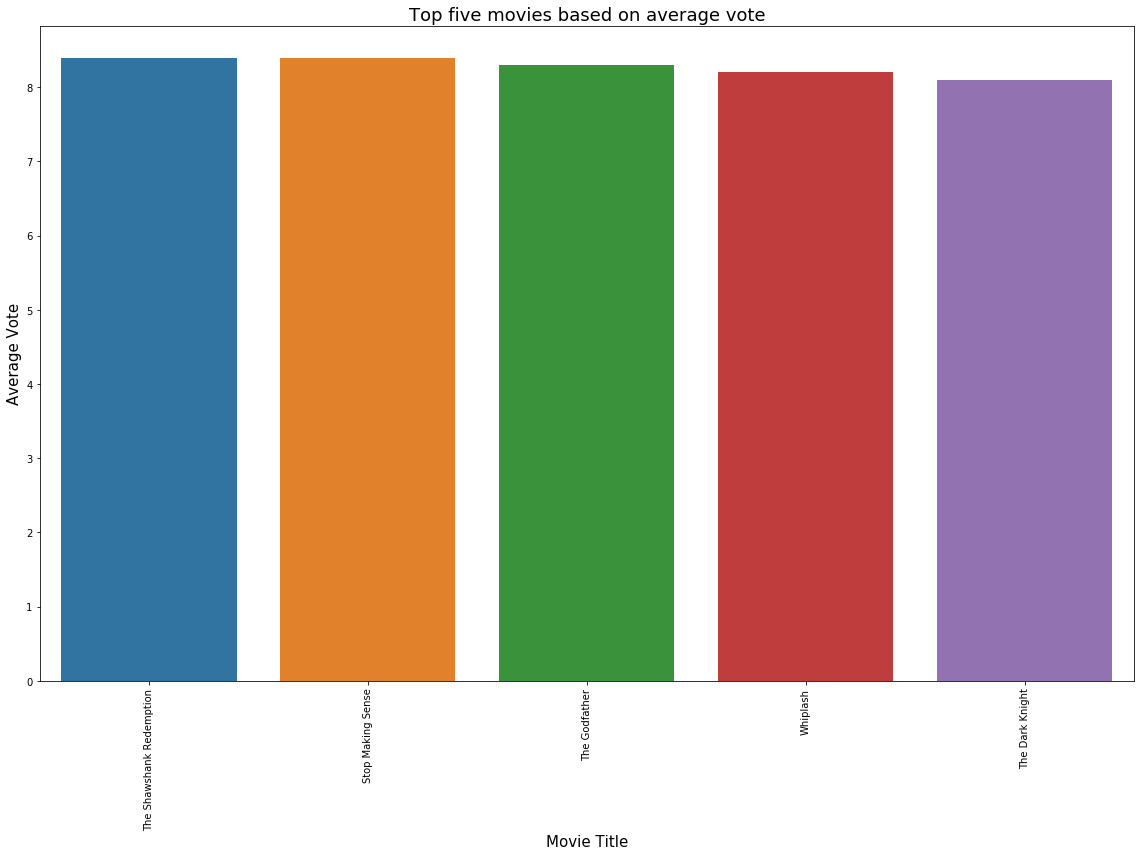

In [24]:
plt.figure(figsize=(16,12))
# make barplot and sort bars in descending order
sns.barplot(x='original_title', 
            y="vote_average", 
            data=df_movie, 
            order=df_movie.sort_values('vote_average',ascending = False).head(5).original_title)
# set labels
plt.xlabel("Movie Title", size=15)
plt.ylabel("Average Vote", size=15)
plt.title("Top five movies based on average vote", size=18)
#rotate x-axis text to make readable 
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

According to the above data The Shawshank Redemption, Stop Making Sense, The Godfather, Whiplash and The Dark Knight are the top five movies based on their average vote.

> Based on the attribute above there will be a corrilation between the top five movies.There might be expectetio that the top movies will be the same from feature to feature but the reverse is true.


### 2 What are the top genres?

In [25]:
df_gener = df_movie['genres'].value_counts()
df_gener = pd.DataFrame(df_gener).reset_index()  
df_gener.columns = ['geners','volume'] 
df_gener.head()

,geners,volume
0,Drama,889
1,Comedy,787
2,Action,689
3,Adventure,314
4,Horror,275


Text(0,0.5,'Volume')

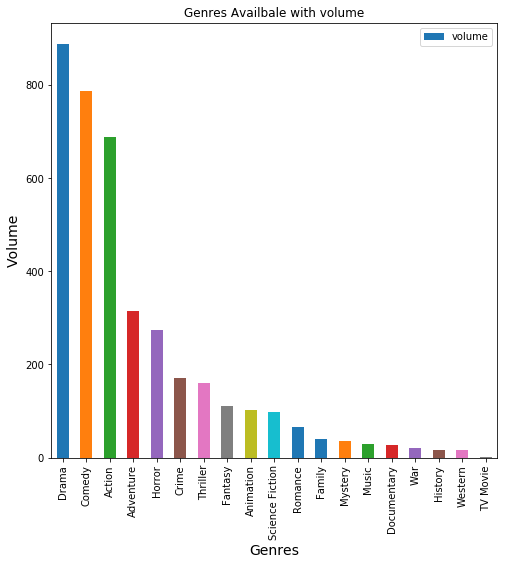

In [26]:
df_gener.plot(x = 'geners', y = 'volume', kind='bar', title='Genres Availbale with volume', figsize = (8,8));
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Volume', fontsize=14)

Based on the above results the top 5 genres are Drama, Comedy, Action, Advanture and Horror.

### 3. Correlations

Based on adjusted revenue, adjusted budget, popularity and average votes we identify the top 5 movies on the above visualization. Lets take a look the correlation between those attribute to know whether they have positive, negative or no correlation between them.


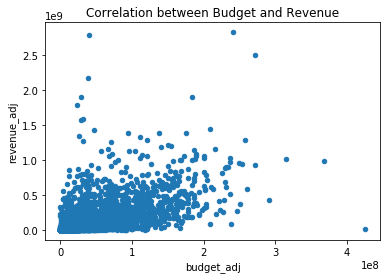

In [27]:
df_movie.plot(x = 'budget_adj', y = 'revenue_adj', title = 'Correlation between Budget and Revenue', kind = 'scatter')

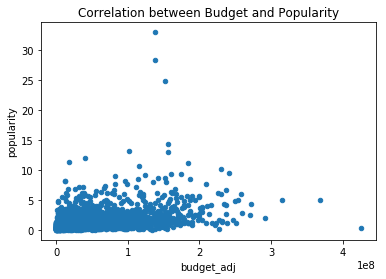

In [28]:
df_movie.plot(x = 'budget_adj', y = 'popularity', title = 'Correlation between Budget and Popularity', kind = 'scatter')

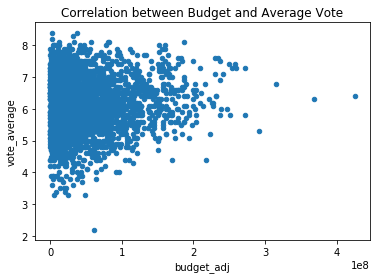

In [29]:
df_movie.plot(x = 'budget_adj', y = 'vote_average', title = 'Correlation between Budget and Average Vote', kind = 'scatter')

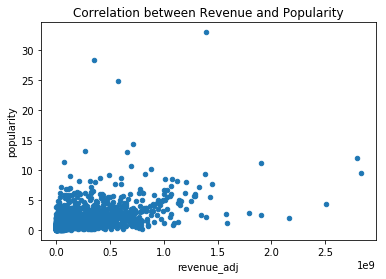

In [30]:
df_movie.plot(x = 'revenue_adj', y = 'popularity', title = 'Correlation between Revenue and Popularity', kind = 'scatter')

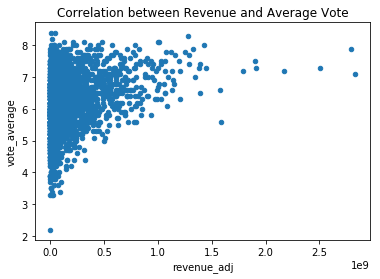

In [31]:
df_movie.plot(x = 'revenue_adj', y = 'vote_average', title = 'Correlation between Revenue and Average Vote', kind = 'scatter')

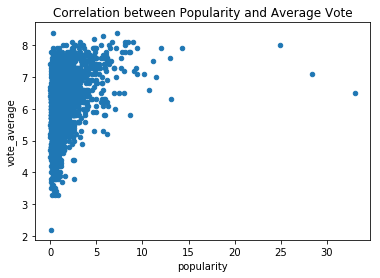

In [32]:
df_movie.plot(x = 'popularity', y = 'vote_average',  title = 'Correlation between Popularity and Average Vote', kind = 'scatter')

1. There is a postive correlation between revenue, popularity and budget, their is a weak positive correlation with avrage vote and the other attributes.
2. Budget will be reason for successful movie
3. The popularity of movie indicates higher budget


<a id='conclusions'></a>
## Conclusions

Jurassic world, Mad max: Fury Road, Interstellar, Guardians of the Galaxy and Insurgent are the top five movies based on their popularity. The Warriors Way, Pirates of the Caribean:on Stranger Tides, Pirates of the Caribean: At World's End, Superman Returns and Titanic are the top five movies based on their adjusted Budget. Avater, Star Wars, Titanic, The Exorcist and Jaws are the top five movies based on their adjusted revenue. The Shawshank Redemption, Stop Making Sense, The Godfather, Whiplash and The Dark Knight are the top five movies based on their average vote. There are 20 genres and from those Drama, Comedy, Action, Advanture and Horror are the top 5 by number of movies. Movie to be successful needs budget. Finally their is a positive correlation between features in the dataset.

## Limitation

1. Zero value data was treated as missed data, so after cleaning the data may not be 100%
2. Some of the data columns were irrelevant
3. Nan values were one of the limitation of the dataset, those thing may leads to create conclusion with mistake.


In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0